In [1]:
import re
import math
import copy
import csv
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from scipy.optimize import curve_fit
import scipy.optimize as optimize

from __future__ import division

%matplotlib inline

## Read in fit results

In [2]:
fact = dict()
fact_err = dict()

In [3]:
typ = 'digi'
factors = dict()
factors_err = dict()
input_file = 'results_site_task_cms_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)
a = len(fact[typ]) / np.sum(fact[typ].values())
fact[typ].update((i, x *a) for i, x in fact[typ].items())
fact_err[typ].update((i, x *a) for i, x in fact_err[typ].items())

In [4]:
typ = 'miniaod'
factors = dict()
factors_err = dict()
input_file = 'results_site_task_cms_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)
a = len(fact[typ]) / np.sum(fact[typ].values())
fact[typ].update((i, x *a) for i, x in fact[typ].items())
fact_err[typ].update((i, x *a) for i, x in fact_err[typ].items())

In [5]:
typ = 'reco'
factors = dict()
factors_err = dict()
input_file = 'results_site_task_cms_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)
a = len(fact[typ]) / np.sum(fact[typ].values())
fact[typ].update((i, x *a) for i, x in fact[typ].items())
fact_err[typ].update((i, x *a) for i, x in fact_err[typ].items())

In [6]:
typ = 'digireco'
factors = dict()
factors_err = dict()
input_file = 'results_site_task_cms_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)
a = len(fact[typ]) / np.sum(fact[typ].values())
fact[typ].update((i, x *a) for i, x in fact[typ].items())
fact_err[typ].update((i, x *a) for i, x in fact_err[typ].items())

In [7]:
typ = 'production'
factors = dict()
factors_err = dict()
input_file = 'results_site_task_cms_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)
a = len(fact[typ]) / np.sum(fact[typ].values())
fact[typ].update((i, x *a) for i, x in fact[typ].items())
fact_err[typ].update((i, x *a) for i, x in fact_err[typ].items())

In [8]:
typ = 'dataprocessing'
factors = dict()
factors_err = dict()
input_file = 'results_site_task_cms_%s_0.001.csv' % typ
with open(input_file) as csvfile:
    r = csv.reader(csvfile, delimiter=',')
    for row in r:
        (cpu, k, k_err) = row
        factors[cpu] = float(k)
        factors_err[cpu] = float(k_err)
fact[typ] = copy.deepcopy(factors)
fact_err[typ] = copy.deepcopy(factors_err)
a = len(fact[typ]) / np.sum(fact[typ].values())
fact[typ].update((i, x *a) for i, x in fact[typ].items())
fact_err[typ].update((i, x *a) for i, x in fact_err[typ].items())

## Plot k factors fitted for each site

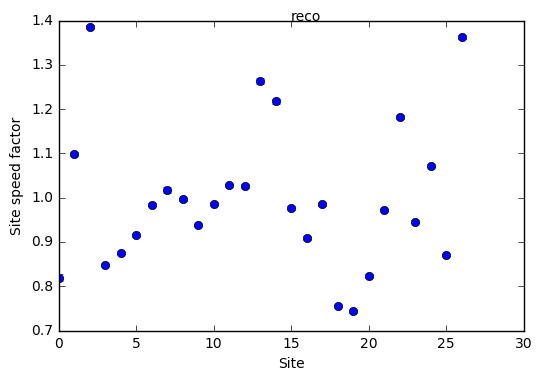

In [32]:
typ = 'reco'

factors = fact[typ]
factors_err = fact_err[typ]

k_avg = dict()
k_std = dict()
x = list()
y = list()
yerr = list()
i = 0
for cpu in fact[typ].keys():
    x.append(i)
    y.append(fact[typ][cpu])
    yerr.append(fact_err[typ][cpu])
    i += 1
plt.figure()
plt.errorbar(x, y, yerr=yerr, fmt='o')
plt.xlabel('Site')
plt.ylabel('Site speed factor')
plt.text(15., 1.4, typ)

In [33]:
df = DataFrame({'k_avg': factors, 'k_std': factors_err}).sort_values(by='k_avg', inplace=False)

## Plot factors for sites

In [34]:
def f(x, m, s, n):
    return n / (s * np.sqrt(2 * np.pi)) * np.exp(-(x - m)**2 / (2 * s**2))

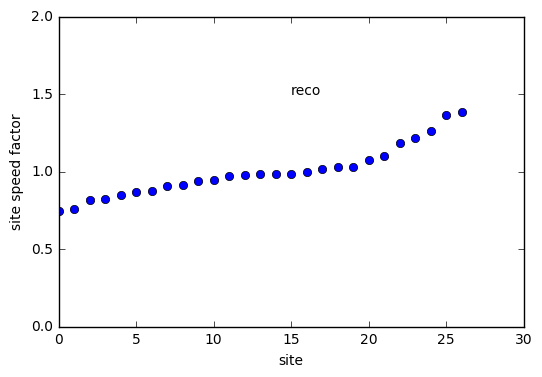

In [35]:
x = range(len(df))
y = df.k_avg
y_err = df.k_std
plt.errorbar(x, y, yerr=y_err, fmt='o')
plt.ylim([0., 2.])
plt.xlabel('site')
plt.ylabel('site speed factor')
plt.text(15., 1.5, typ)

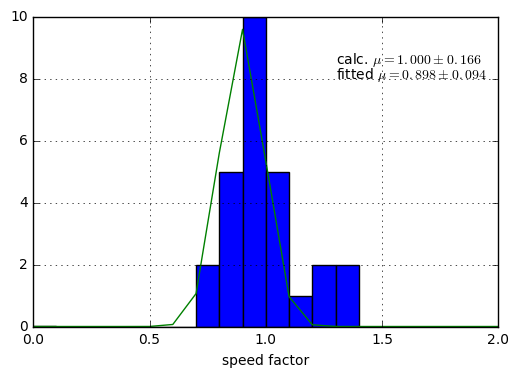

In [36]:
t, s = np.histogram(y, bins=20, range=[0., 2.])
y.hist(bins=20, range=[0., 2])
(m, si, n), _ = optimize.curve_fit(f, s[:-1], t.tolist())
plt.plot(s, f(s, m, si, n))
plt.xlabel('speed factor')
plt.text(1.3, 8.5, r'calc. $\mu=%.3f\pm%.3f$' % (y.mean(), y.std()))
plt.text(1.3, 8., r'fitted $\mu=%.3f\pm%.3f$' % (m, si))

## Plot correlation between factors for evgen and simul

32.0


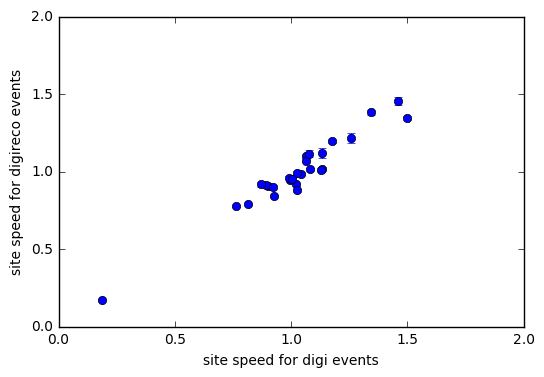

In [40]:
type1 = 'digi'
type2 = 'digireco'
fact1 = fact[type1]
fact2 = fact[type2]
fact1_err = fact_err[type1]
fact2_err = fact_err[type2]
#print fact2['Intel(R) Xeon(R) CPU E5-2640 v2 @ 2.00GHz 4096 KB']
x = list()
y = list()
x_err = list()
y_err = list()
s1 = set(fact1.keys())
s2 = set(fact2.keys())
s = s2.intersection(s1)
for cpu in s:
#    print '%s\t%s\t%s' % (cpu, fact1[cpu], fact2[cpu])
    x.append(fact1[cpu])
    x_err.append(fact1_err[cpu])
    y.append(fact2[cpu])
    y_err.append(fact2_err[cpu])
plt.xlim([0., 2.])
plt.ylim([0., 2.])
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o')
plt.xlabel('site speed for %s events' % type1)
plt.ylabel('site speed for %s events' % type2)
print np.nansum(fact2.values())

In [77]:
print np.corrcoef(x, y, 0)

[[ 1.         0.5774336]
 [ 0.5774336  1.       ]]


## Fit to a straight line

In [78]:
def f(x, a, b):
    return a * x + b

res = curve_fit(f, x, y)

print "The slope of the linear fit is %f +- %f" % (res[0][0], np.sqrt(res[1][0][0]))
print "The intercept of the linear fit is %f +- %f" % (res[0][1], np.sqrt(res[1][1][1]))

The slope of the linear fit is 0.831669 +- 0.245193
The intercept of the linear fit is 0.138686 +- 0.254732


0.0430420689359


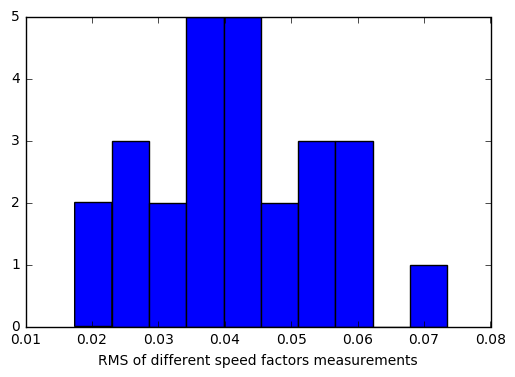

In [47]:
types = ['digi', 'miniaod', 'reco', 'digireco']
s = set(fact[types[0]].keys())
stds = list()
for typ in types:
    f = fact[typ]
    s = s.intersection(set(f.keys()))
for cpu in s:
    x = [fact[typ][cpu] for typ in types]
    stds.append(np.std(x))
print np.median(stds)
plt.hist(stds)
plt.xlabel('RMS of different speed factors measurements')